**This is the idea notebook for the final project**

In [1]:
%matplotlib inline
import numpy 
from sympy import *
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

**Final Project Approach**

* 

*Background: Abstract of Master’s Thesis*

**Design of a Two-Axis Gimbal with Academic Examples**

The purpose of this thesis is to design a two-axis gimbal system and provide a compilation of postgraduate academic examples comprising the engineering details and considerations for designing, analyzing, building, and testing a precision machine. The author follows a deterministic design process to design a two-axis gimbal mechanism for shipboard use. A set of academic examples complement the two-axis gimbal system design by presenting the engineering investigations and conclusions at each step throughout design progression, and include the deterministic design process and introduction to the FRDPARRC table; strategy and concept generation, analysis, and assessment; and engineering and development of modules and components, including bench testing and manufacturability. Each academic example is refined through teaching in the graduate advanced mechanical engineering design course at The George Washington University.

*MAE6286 Final Design Project-**THIS IS A NEW EXAMPLE CREATED FOR THIS CLASS AND TO BE INCLUDED IN THE THESIS***

The focus is the design of the Azimuth (and Elevation if time allows) stage motor, specifically to determine acceleration, velocity, and position profiles during one full rotation ( start at 0 deg, stop at 360 deg) at a maximum current and power input during an extreme environmental wind event. Factors include an induced wind torque that changes with position, and a bearing frictional torque that changes with speed.

Additionally the required motor torque profile will be examined, and induced temperature in the motor windings will be determined and factored dynamically into the equation as a resistance change.

**Requirements**
* Determine Acceleration Profile and ensure it achieves an acceleration of 50 deg/s
* Determine Velocity Profile and ensure it achieves a velocity of 50 deg/s
* Determine Position Profile
* Determine the Input Current profile for starting at 0 Degrees and stopping at 360 degrees, model as a constant step function
* Determine the time to complete the rotation
* Determine maximum winding temperature

**Given**
* Operate during a wind velocity of 155 knots - The estimated wind induced torque is modeled after a research paper on rectangular prisms as airfoils (will cite appropriately)
* Rated maximum motor power is 250 Watts
* Rated maximum controller current is 25 Amps

In [3]:
theta = [0,3.75,7.5,11.25,15,20,25,30,35,40,45,50,60,75,90,105,120,130,135,140,145,150,155,160,165,168.75,172.5,176.25,180,183.75,187.5,191.25,195,200,205,210,215,220,225,230,240,255,270,285,300,310,315,320,325,330,335,340,345,348.75,352.5,356.25,360]
torque_wind = [16,5,13,-26,-31,-31,-26,-13,-5,0,5,10,21,50,10,-49,-21,-10,-5,0,5,13,26,31,31,26,-13,-5,16,5,13,-26,-31,-31,-26,-13,-5,0,5,10,21,50,10,-49,-21,-10,-5,0,5,13,26,31,31,26,-13,-5,16]

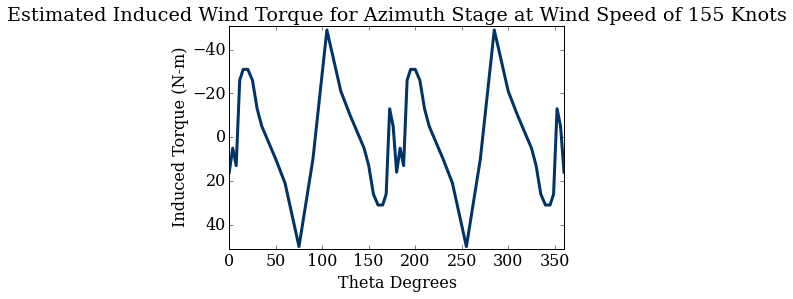

In [4]:
pyplot.plot(theta, torque_wind, color='#003366', ls='-', lw=3)
pyplot.title('Estimated Induced Wind Torque for Azimuth Stage at Wind Speed of 155 Knots')
pyplot.ylabel('Induced Torque (N-m)')
pyplot.xlabel('Theta Degrees')
pyplot.xlim(0,360);
pyplot.ylim(51,-51);

**Approach**

Total torque is a combination of motor torque, torque losses due to friction in the bearings and seals, and external input torque due to a wind induced moment (yaw moment for the azimuth stage and pitch moment for the elevation stage).

$$\tau_\rm{total} = \tau_\rm{motor}+\tau_\rm{friction}+\tau_\rm{environmental} = I_\rm{inertia}\alpha$$

Solving for motor torque.

$$\tau_\rm{motor} = I_\rm{inertia}\alpha-\tau_\rm{friction}-\tau_\rm{environmental}$$

Set the input power equal to the output power for conservation of system energy.

$$Power_\rm{electrical} = Power_\rm{mechanical} + Power_\rm{thermalloss}$$

Input power is the electrical power at the motor controller, mechanical power is the product of torque and speed, and thermal losses are dependent on the applied current and the winding resistance.
$$IV = \tau_\rm{motor}\omega + I^2R$$

$$IV - I^2R = \tau_\rm{motor}\omega$$

substitute in equation for motor torque

$$IV - I^2R  = (I_\rm{inertia}\alpha-\tau_\rm{friction}-\tau_\rm{environmental})\omega$$

Rearrange the equation to solve for alpha

$$\frac{IV - I^2R}{\omega}+\tau_\rm{friction}+\tau_\rm{environmental}= I_\rm{inertia}\alpha$$

updateing the equation for functional dependence

$$\frac{250 - I(t)^2R(T)}{\omega(t)}+\tau_\rm{friction}(\omega)+\tau_\rm{environmental}(\theta)= I_\rm{inertia}\alpha(t)$$

This equation takes the form of a second order non-linear ordinary differential equation

$$\frac{A}{\omega}+ B\omega +C\theta +D= \alpha$$

$$\frac{A}{\theta'}+ B\theta' +C\theta +D= \theta''$$

With an input $I(t)$, a temperature dependent $R(T)$, a velocity dependent $tau_\rm{friction}(\omega)$ and a position dependent $tau_\rm{environmental}(\theta)$ a system of 4 equations are to be solved.







$$Power_\rm{mechanical} = I_\rm{applied}V_\rm{induced} = \tau_\rm{motor}\omega$$

$$I_\rm{applied}(V_\rm{applied}-RI_\rm{applied}-LdI/dt) = \tau_\rm{motor}\omega$$
$$I_\rm{applied}V_\rm{applied}-RI_\rm{applied}^2 -LI_\rm{applied}dI/dt) = \tau_\rm{motor}\omega$$

$$\tau_\rm{total} = \tau_\rm{motor}+\tau_\rm{friction}+\tau_\rm{environmental} = I_\rm{inertia}\alpha$$

$$\tau_\rm{motor} = I_\rm{inertia}\alpha-\tau_\rm{friction}-\tau_\rm{environmental}$$

$$I_\rm{applied}V_\rm{applied}-RI_\rm{applied}^2 -LI_\rm{applied}dI/dt) = (I_\rm{inertia}\alpha-\tau_\rm{friction}-\tau_\rm{environmental})\omega$$


http://hades.mech.northwestern.edu/index.php/Brushed_DC_Motor_Theory

**Please let me know your thoughts if this is an acceptable MAE 6286 Design Project**



**classwork from module 1**

* use euler method (first order method)
* convergance
* runga kutta (second order method) (add more orders)
* convergance
* leapfrog
* convergence

* add adiitional method?

* discontinuities set the derivitative equal to sero? look into this

* add additional methods


* ?use a demand acc,vel,position profile and solve polynomial I(t) analytically.  then use the I(t) as the input and use mulitple methods to compare the profile output of each method to the demand solution... show errors.?

* use docstrings triple quote ### to have help for functions



post to Piazza Draft by Dec 8 for Review


   "**classwork from module 1**\n",
    "\n",
    "* use euler method (first order method)\n",
    "* convergance\n",
    "* runga kutta (second order method) (add more orders)\n",
    "* convergance\n",
    "* leapfrog\n",
    "* convergence\n",
    "\n",
    "* add adiitional method?\n",
    "\n",
    "* discontinuities set the derivitative equal to sero? look into this\n",
    "\n",
    "* add additional methods\n",
    "\n",
    "\n",
    "* ?use a demand acc,vel,position profile and solve polynomial I(t) analytically.  then use the I(t) as the input and use mulitple methods to compare the profile output of each method to the demand solution... show errors.?\n",
    "\n",
    "* use docstrings triple quote ### to have help for functions\n",
    "\n",
    "\n",
    "\n",
    "post to Piazza Draft by Dec 8 for Review\n"

add citations from real books, google books add citations from real books, google books
update piazza post

update the post to inlcude the following:
* add efficiency to the equation -> solve a polynomial equation as a mechanical designer
* use current equation -> solve an ODE an an intro to numerical methods
* add additional electro motive force consideration to the equation -> solve a PDE for numerical methods
* compare the solutions to show the benefits of numerical methods

The cells below are just notes at the moment for comparison if the input was a demand acceleration profile and the unknown was the current. In the below case the solution for curernt I(t) would be a polynomial equation.

In [5]:
acc = 50
vel = 50
timemax = 1+(360-2*acc/2)/vel+1
time = numpy.linspace(0,timemax,83)

aprofile = numpy.zeros(len(time))
aprofile[:11]=acc
aprofile[-11:]=-acc
vprofile = numpy.zeros(len(time))
vprofile[:] = vel
vprofile[:11]=acc*time[:11]
vprofile[-11:]=-acc*(time[-11:]-time[-11])+vel

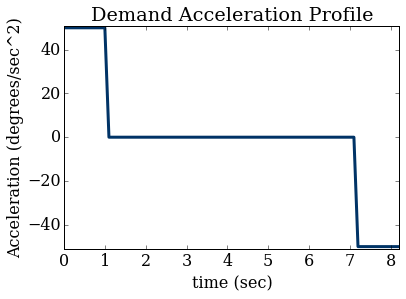

In [6]:
pyplot.plot(time, aprofile, color='#003366', ls='-', lw=3)
pyplot.title('Demand Acceleration Profile')
pyplot.ylabel('Acceleration (degrees/sec^2)')
pyplot.xlabel('time (sec)')
pyplot.xlim(0,timemax);
pyplot.ylim(-acc-1,acc+1);

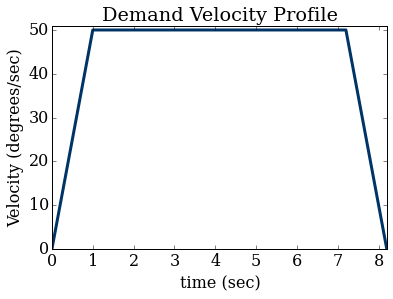

In [7]:
pyplot.plot(time, vprofile, color='#003366', ls='-', lw=3)
pyplot.title('Demand Velocity Profile')
pyplot.ylabel('Velocity (degrees/sec)')
pyplot.xlabel('time (sec)')
pyplot.xlim(0,timemax);
pyplot.ylim(0,vel+1);

In [2]:
T = 10
dt = 0.1
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

# initial conditions
I = numpy.linspace(0.0, T, N)
#Ivalue = 5
#I[:] = Ivalue
#I[int(1/dt):int(3/dt)] = -Ivalue
#I[int(5/dt):int(7/dt)] = -Ivalue
#I[int(9/dt):int(10/dt)] = -Ivalue


V = 28
Inertia = 26.831
R = 0.143
Kn = 364*2*numpy.pi/60
Km = .0263

alpha = numpy.zeros(N)
alpha[:] = 0.0
omega = numpy.zeros(N)
omega[:] = 0.0
omega[0] = 50*numpy.pi/180
theta = numpy.zeros(N)
theta[:] = 0.0
theta[0] = numpy.pi

# time-loop using Euler's method
for n in range(1,N):
    omega[n] = omega[n-1] + dt*(I[n-1]*(V-R*I[n-1])/(Inertia*omega[n-1]))
    theta[n] = theta[n-1] + dt*omega[n-1]
    alpha[n] = (omega[n]-omega[n-1])/dt
    #if theta[n]>2*numpy.pi:
    #    V=-28
    #if theta[n]<0:
    #    timestamp = (n-1)*dt
    #    break
#timestamp

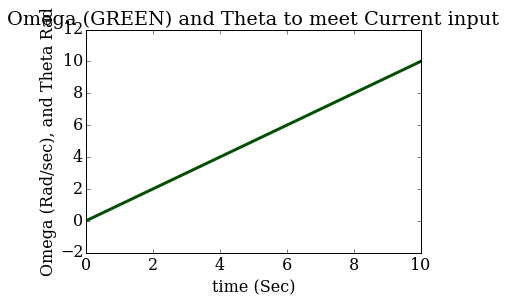

In [3]:
pyplot.plot(t, I, color='#005000', ls='-', lw=3)
pyplot.title('Omega (GREEN) and Theta to meet Current input')
pyplot.ylabel('Omega (Rad/sec), and Theta Rad')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,T);
pyplot.ylim(numpy.amin(I)-2,numpy.amax(I)+2);

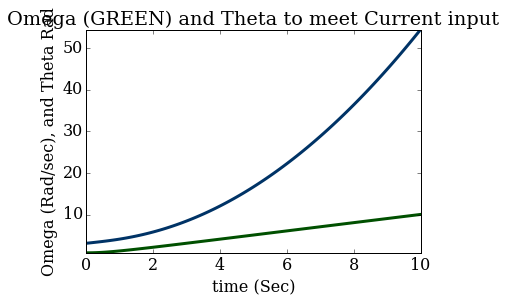

In [4]:
pyplot.plot(t, omega, color='#005000', ls='-', lw=3)
pyplot.plot(t, theta, color='#003366', ls='-', lw=3)
pyplot.title('Omega (GREEN) and Theta to meet Current input')
pyplot.ylabel('Omega (Rad/sec), and Theta Rad')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,T);
pyplot.ylim(numpy.amin(omega),numpy.amax(theta));

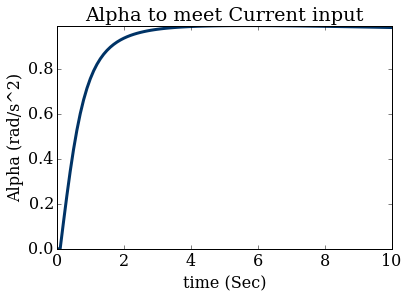

In [5]:
pyplot.plot(t, alpha, color='#003366', ls='-', lw=3)
pyplot.title('Alpha to meet Current input')
pyplot.ylabel('Alpha (rad/s^2)')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,T);
pyplot.ylim(numpy.amin(alpha),numpy.amax(alpha));

In [151]:
T = 4
dt = 0.0001
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

# initial conditions
I0 = 0.0001
omega0 = 0
theta0 = 0
V = 28
Inertia = 26.831
alpha = 50*numpy.pi/180
R = 0.143
L = .0565/1000

I = numpy.zeros(N)
I[0] = I0
omega = numpy.zeros(N)
omega[0] = omega0
theta = numpy.zeros(N)
theta[0] = theta0 

# time-loop using Euler's method
for n in range(1,N):
    I[n] = I[n-1] + dt*(V-Inertia*alpha*omega[n-1]/I[n-1] - R*I[n-1])/L
    omega[n] = omega[n-1] + dt*alpha
    theta[n] = theta[n-1] + dt*omega[n-1]
    if theta[n]>2*numpy.pi:
        timestamp = (n-1)*dt
        break
timestamp
        

3.7947

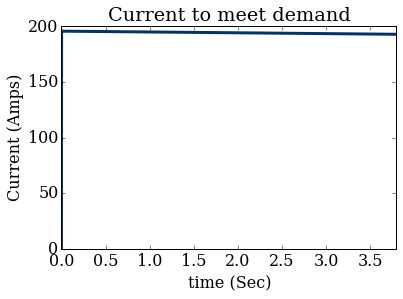

In [58]:
pyplot.plot(t, I, color='#003366', ls='-', lw=3)
pyplot.title('Current to meet demand')
pyplot.ylabel('Current (Amps)')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,timestamp);
pyplot.ylim(0,numpy.amax(I)+5);

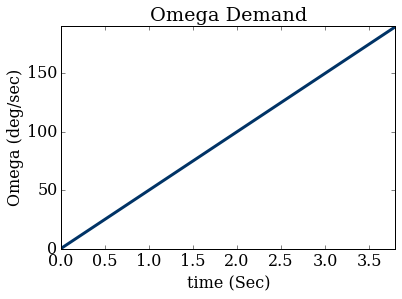

In [16]:
pyplot.plot(t, omega*180/numpy.pi, color='#003366', ls='-', lw=3)
pyplot.title('Omega Demand')
pyplot.ylabel('Omega (deg/sec)')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,timestamp);
pyplot.ylim(0,numpy.amax(omega)*180/numpy.pi+1);

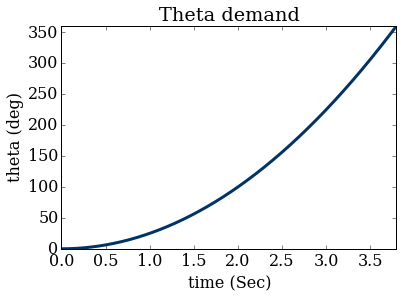

In [17]:
pyplot.plot(t, theta*180/numpy.pi, color='#003366', ls='-', lw=3)
pyplot.title('Theta demand')
pyplot.ylabel('theta (deg)')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,timestamp);
pyplot.ylim(0,numpy.amax(theta)*180/numpy.pi+1);

In [18]:
T = 4
dt = 0.0001
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

# initial conditions
omega0 = 0
theta0 = 0
V = 28
Inertia = 26.831/300
alpha = 50*numpy.pi/180
R = 0.143
L = .0565/1000

Iplus = numpy.zeros(N)
Iminus = numpy.zeros(N)
omega = numpy.zeros(N)
omega[0] = omega0
theta = numpy.zeros(N)
theta[0] = theta0 

# time-loop using Euler's method
for n in range(1,N):
    Iplus[n] = (V+ (V**2-4*R*(-Inertia*alpha*omega[n]))**(1/2))/(2*R)
    #Iminus[n] = (V- (V**2-4*R*(-Inertia*alpha*omega[n]))**(1/2))/(2*R)
    omega[n] = omega[n-1] + dt*alpha
    theta[n] = theta[n-1] + dt*omega[n-1]
    if theta[n]>2*numpy.pi:
        timestamp = (n-1)*dt
        break
timestamp
        

3.7947

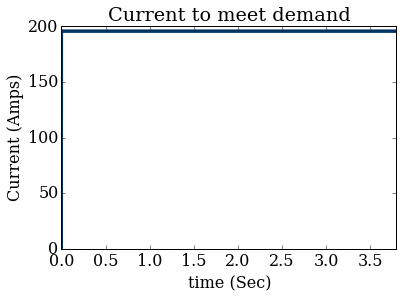

In [19]:
pyplot.plot(t, Iplus, color='#003366', ls='-', lw=3)
pyplot.plot(t, I, color='#003366', ls='-', lw=3)
pyplot.title('Current to meet demand')
pyplot.ylabel('Current (Amps)')
pyplot.xlabel('time (Sec)')
pyplot.xlim(0,timestamp);
pyplot.ylim(0,numpy.amax(Iplus)+5);

In [20]:
I[30000]-Iplus[30000]

-0.0072968018567109993

In [25]:
T = 4
# time-increment array
dt_values = numpy.array([0.0001, 0.00001, 0.000001])

# array that will contain solution of each grid
I_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)

    # initial conditions
    I0 = 0.01
    omega0 = 0
    theta0 = 0
    V = 28
    Inertia = 26.831/300
    alpha = 50*numpy.pi/180
    R = 0.143
    L = .0565/1000

    I = numpy.zeros(N)
    I[0] = I0
    omega = numpy.zeros(N)
    omega[0] = omega0
    theta = numpy.zeros(N)
    theta[0] = theta0 

    # time-loop using Euler's method
    for n in range(1,N):
        I[n] = I[n-1] + dt*(V-Inertia*alpha*omega[n-1]/I[n-1] - R*I[n-1])/L
        omega[n] = omega[n-1] + dt*alpha
        theta[n] = theta[n-1] + dt*omega[n-1]
        if theta[n]>2*numpy.pi:
            timestamp = (n-1)*dt
            break
    timestamp
 
    I_values[i] = I.copy()    # store the total elevation calculation grid i

In [26]:
def get_error(I, dt):
    """Returns the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1} norm of the error with respect to the exact solution.
    """
    N = len(I)
    t = numpy.linspace(0.0, T, N)
    
    # initial conditions
    omega0 = 0
    theta0 = 0
    V = 28
    Inertia = 26.831/300
    alpha = 50*numpy.pi/180
    R = 0.143
    L = .0565/1000

    Iplus = numpy.zeros(N)
    Iminus = numpy.zeros(N)
    omega = numpy.zeros(N)
    omega[0] = omega0
    theta = numpy.zeros(N)
    theta[0] = theta0 

    # time-loop using Euler's method
    for n in range(1,N):
        Iplus[n] = (V+ (V**2-4*R*(-Inertia*alpha*omega[n]))**(1/2))/(2*R)
        #Iminus[n] = (V- (V**2-4*R*(-Inertia*alpha*omega[n]))**(1/2))/(2*R)
        omega[n] = omega[n-1] + dt*alpha
        theta[n] = theta[n-1] + dt*omega[n-1]
        if theta[n]>2*numpy.pi:
            timestamp = (n-1)*dt
            break
    timestamp
        
    
    return dt * numpy.sum(numpy.abs(I-Iplus))

In [27]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(I_values[i], dt)

(9.9999999999999995e-07, 0.0001, 0.01, 0.10000000000000001)

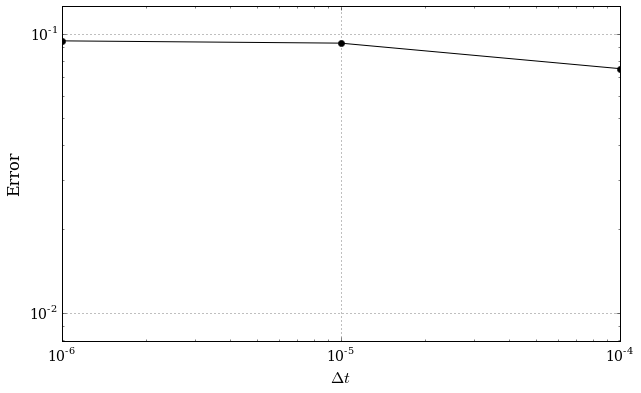

In [28]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;

relook at keeping I constant
relook at the correct values for acceleration and velocity and moment of inertia due to motor control... the motor shuold be at max torque and go to 17*300 rpm maximum velocity